<a href="https://colab.research.google.com/github/vsilchev/hse-intro-ml/blob/master/Seminar_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [0]:
df = pd.read_csv('bike_sharing_demand.csv', parse_dates=['datetime'])

In [0]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [0]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [0]:
# generate datetime features
df['dayofweek'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour

In [0]:
print(df.shape)
df[['datetime', 'dayofweek', 'month', 'hour']].head()

(10886, 15)


,datetime,dayofweek,month,hour
0,2011-01-01 00:00:00,5,1,0
1,2011-01-01 01:00:00,5,1,1
2,2011-01-01 02:00:00,5,1,2
3,2011-01-01 03:00:00,5,1,3
4,2011-01-01 04:00:00,5,1,4


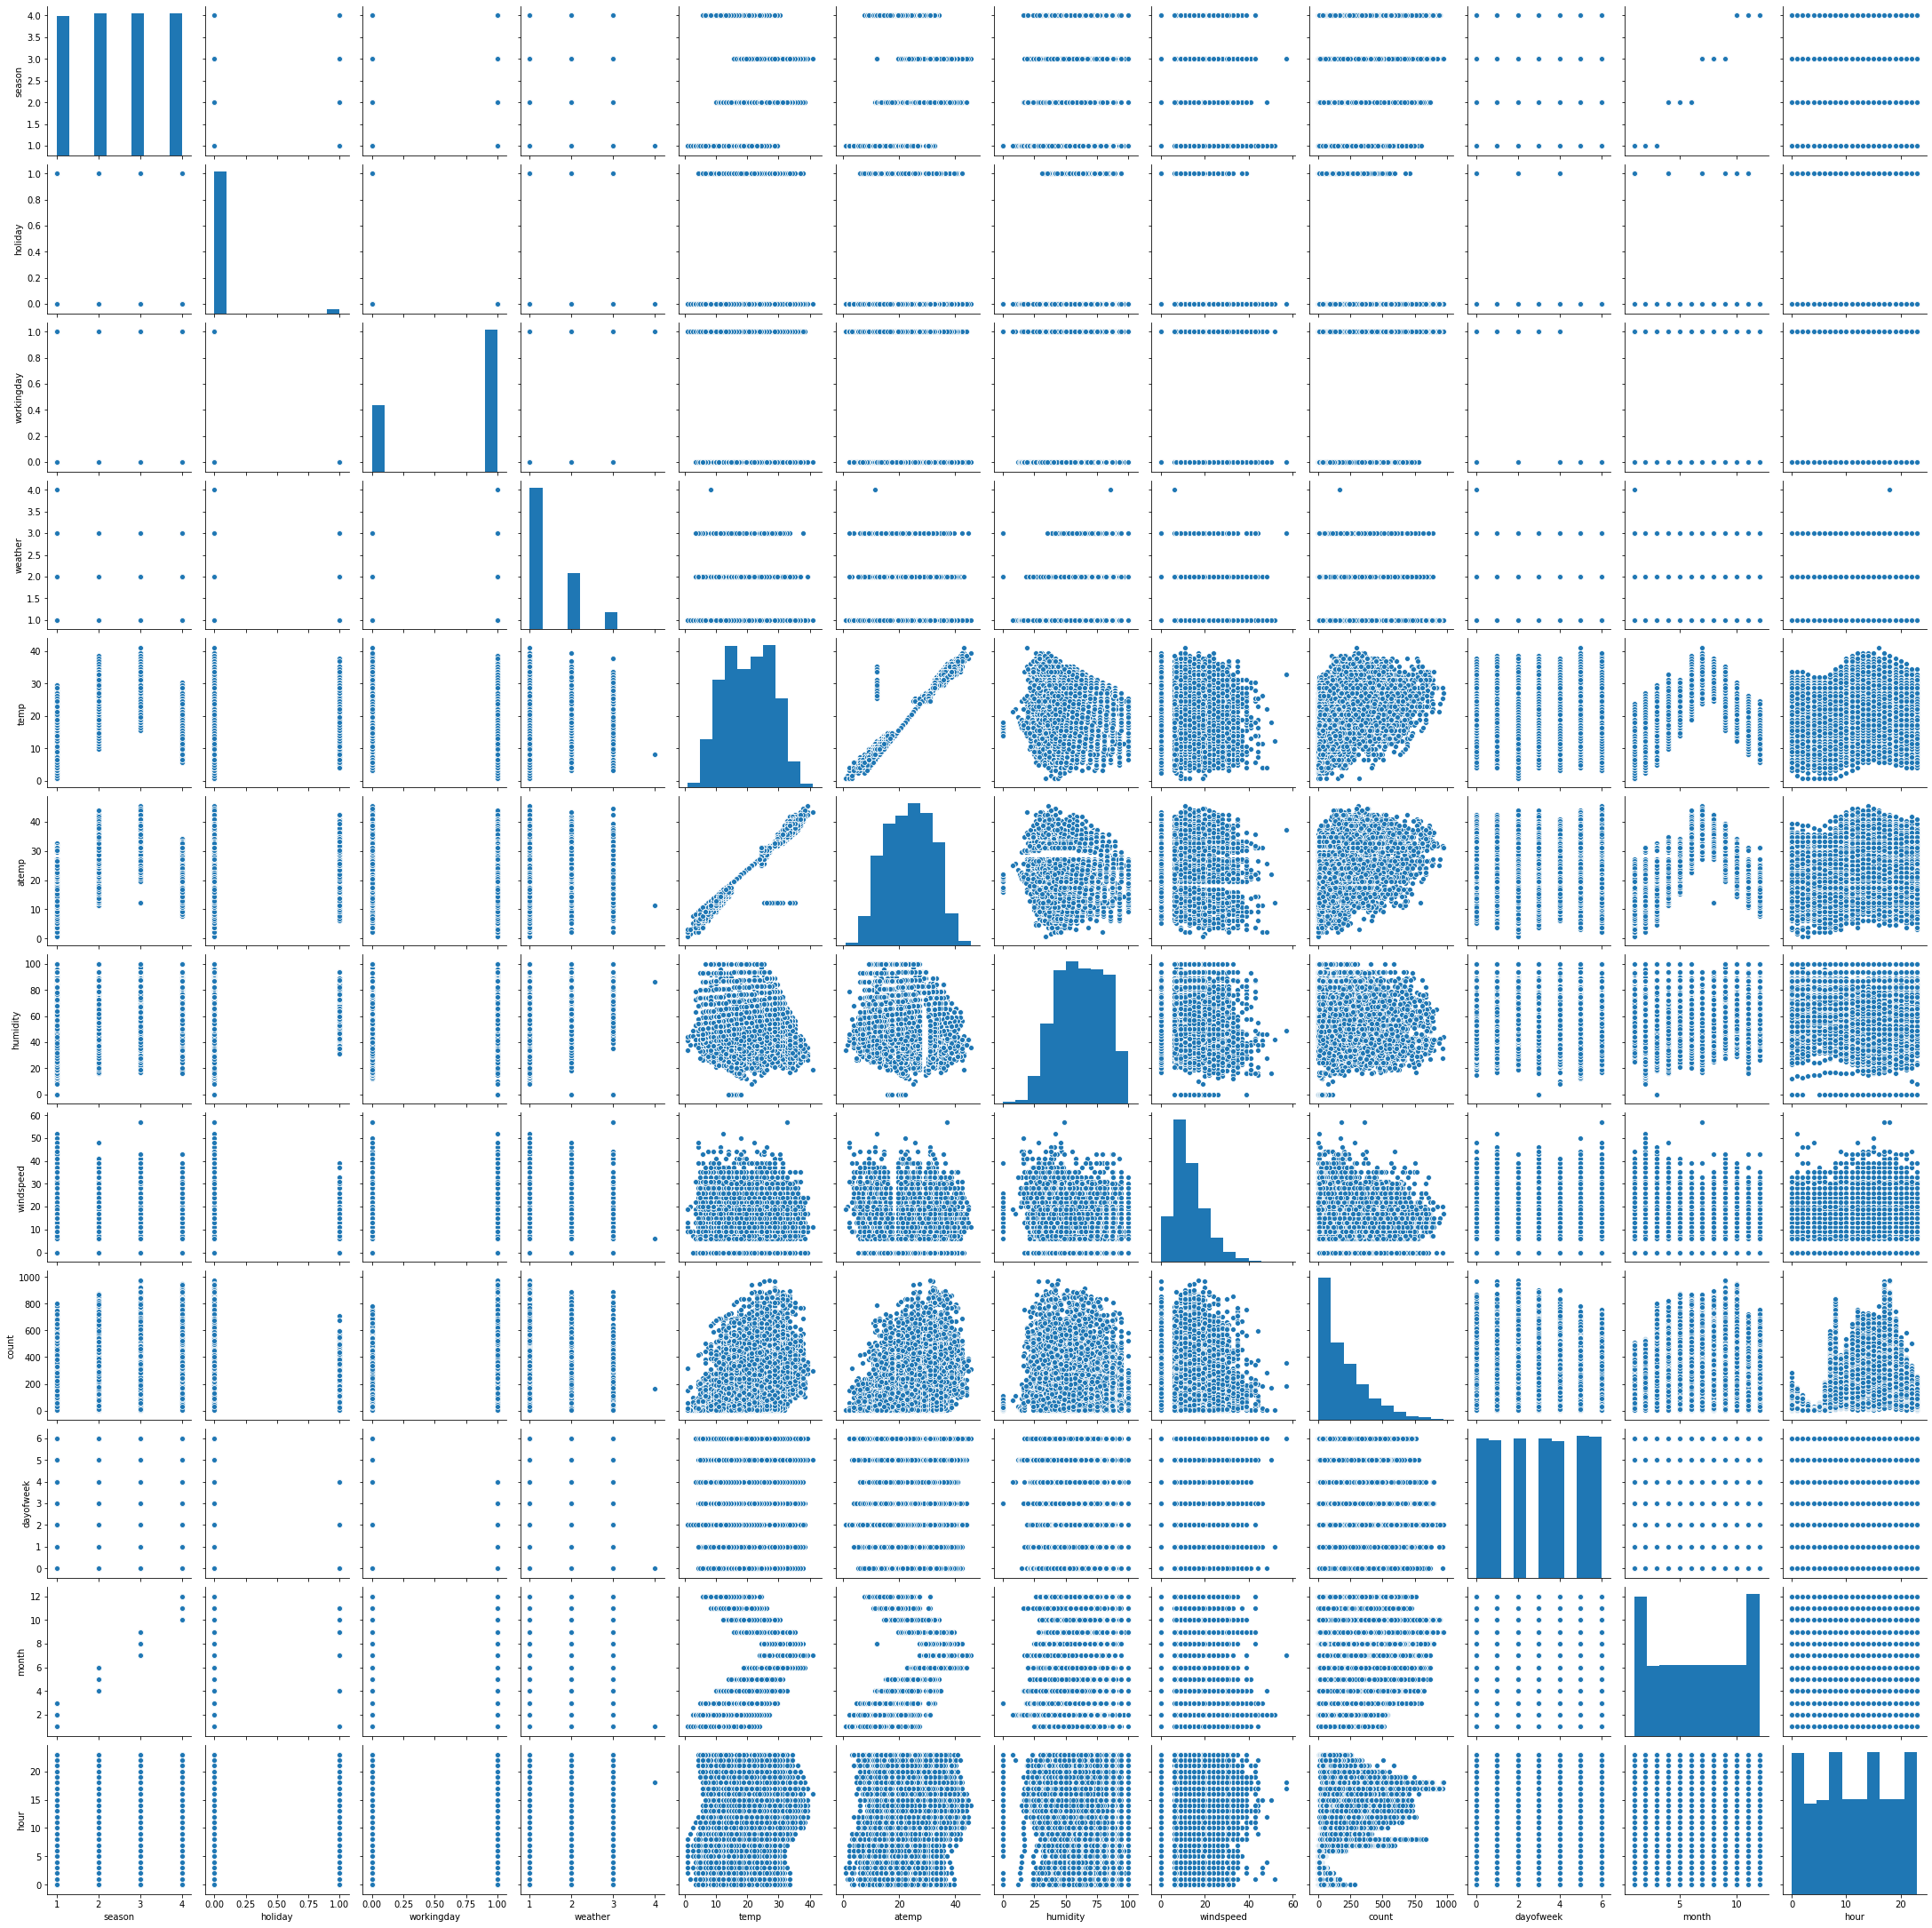

In [0]:
sns.pairplot(df.drop(columns=['datetime', 'casual', 'registered']))

In [0]:
X = df.drop(columns=['datetime', 'casual', 'registered', 'count', 'temp'])
Y = df['count']

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=False)

In [0]:
dummy_model = LinearRegression(normalize=True).fit(X_train, Y_train)

In [0]:
Y_pred = dummy_model.predict(X_test)
loss = mean_squared_error(Y_test, Y_pred)
print(loss)

39402.7660758648


In [0]:
def print_model(model, columns):
    l = list(zip(columns, model.coef_))
    for col, coef in sorted(l, key=lambda x: x[1], reverse=True):
        print("{}: {}".format(col, coef))
    print("Intercept: {}".format(model.intercept_))

In [0]:
print_model(dummy_model, X.columns)

atemp: 6.975189671561644
hour: 6.548094535872564
month: 6.107701478211358
dayofweek: 1.6573485764050608
windspeed: 0.34931866991244187
workingday: -0.1040427350748525
humidity: -1.7727769535748852
holiday: -3.4338073867178576
weather: -8.635266032625614
season: -16.40049903593484
Intercept: 46.935820430984194


In [0]:
lasso_model = Lasso(alpha=1).fit(X_train, Y_train)
mean_squared_error(Y_test, lasso_model.predict(X_test))

39299.40785512455

In [0]:
print_model(lasso_model, X.columns)

atemp: 7.006085384091863
hour: 6.500565562204092
dayofweek: 1.5681396921914266
month: 0.8948441281665461
windspeed: 0.2947375142328813
season: -0.0
holiday: -0.0
workingday: 0.0
humidity: -1.8212991305460653
weather: -5.4972696285818055
Intercept: 39.275008578283945


In [0]:
ridge_model = Ridge(alpha=2.0).fit(X_train, Y_train)
mean_squared_error(Y_test, ridge_model.predict(X_test))

39402.20751686276

In [0]:
print_model(ridge_model, X.columns)

atemp: 6.975318847564973
hour: 6.5479966213000536
month: 6.087668191369669
dayofweek: 1.660155949531604
windspeed: 0.34923649603369206
workingday: -0.09137578679739002
humidity: -1.7728701388136547
holiday: -3.400402363012613
weather: -8.62857258796097
season: -16.33705558290276
Intercept: 46.88602257281042


In [0]:
X2 = df.drop(columns=['datetime', 'temp', 'season', 'holiday', 'workingday', 'casual', 'registered', 'count'])
Y = df['count']
X2_train, X2_test = train_test_split(X2, shuffle=False)

In [0]:
ridge_model2 = Ridge(alpha=5).fit(X2_train, Y_train)
print_model(ridge_model2, X2.columns)

atemp: 7.005217403511938
hour: 6.54443832111371
dayofweek: 1.79676755261244
month: 0.94070930584018
windspeed: 0.3454080579099484
humidity: -1.7727333898327482
weather: -8.514119027649928
Intercept: 38.469939975415


In [0]:
mean_squared_error(Y_test, ridge_model2.predict(X2_test))

39295.171664781345